In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv',index_col= [0],parse_dates=[0])
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [13]:
series_values = f_birth.values
type(series_values)


numpy.ndarray

In [14]:
f_birth.size

366

In [15]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [16]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


We can see here there is an outlier of 1959 this is obvious when investigating the interquartile range and the deviation 

In [17]:
f_birth=f_birth[:-1]

In [18]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '1959-11-12'),
  Text(0.0, 0, '1959-01-01'),
  Text(50.0, 0, '1959-02-20'),
  Text(100.0, 0, '1959-04-11'),
  Text(150.0, 0, '1959-05-31'),
  Text(200.0, 0, '1959-07-20'),
  Text(250.0, 0, '1959-09-08'),
  Text(300.0, 0, '1959-10-28'),
  Text(350.0, 0, '1959-12-17'),
  Text(400.0, 0, '')])

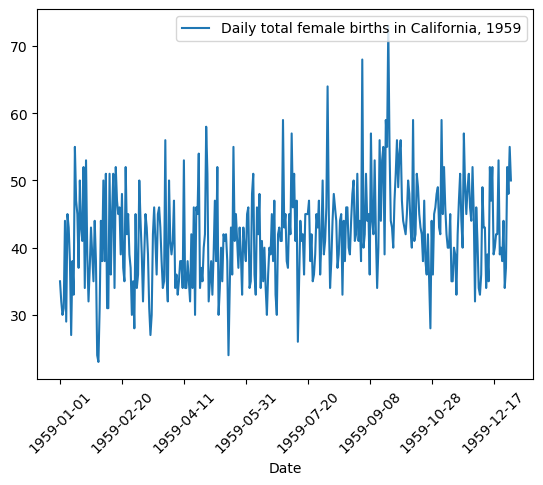

In [24]:
f_birth.plot()
plt.xticks(rotation = 45)

Stationary - suggests a series with no trend factors , a constant mean and constant standard deviation.
Smoothing series - utilising moving averages to "smoothen" a distribution


<Axes: xlabel='Date'>

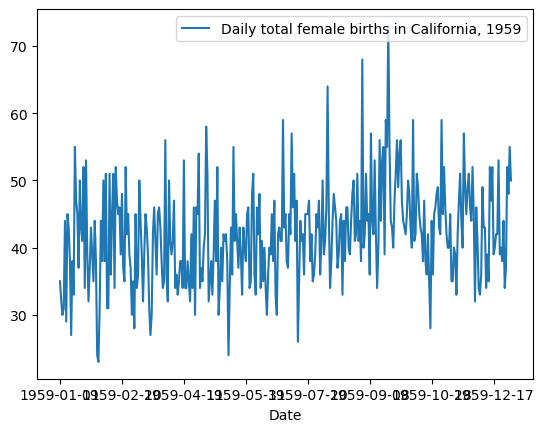

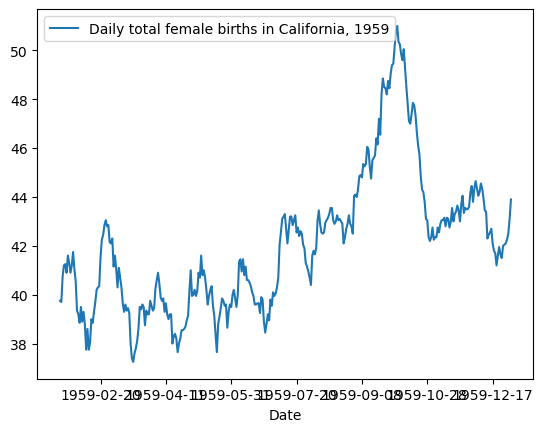

In [27]:
f_birth_mean = f_birth.rolling(window = 20).mean()
f_birth.plot()
f_birth_mean.plot()